#Import Library

In [ ]:
#importing the required libraries
# Library for numerical computation
import numpy as np
# Library for interacting with the operating system
import os
# Library for working with time
import time
# Module for processing and manipulating images
from keras.preprocessing import image
# Keras layers used to build model architecture
from keras.layers import Dense, Activation, Flatten
# Function for shuffling datasets
from sklearn.utils import shuffle
# Function for splitting dataset into training and testing subsets
from sklearn.model_selection import train_test_split
# Keras submodule for layers
from keras import layers
# Classes for defining functional model
from keras import Model, Input
# Optimizer for training model
from tensorflow.keras.optimizers import RMSprop
# Function for converting class labels to binary vectors
from tensorflow.keras.utils import to_categorical
# Class for creating sequential models
from keras.models import Sequential
# Keras module for model and layer definitions
from tensorflow.keras import models, layers
# Library for creating visualizations
import matplotlib.pyplot as plt
# Library for statistical visualizations
import seaborn as sns
# Pre-trained ResNet152V2 model
from keras.applications import ResNet152V2
# Callback for early stopping training
from keras.callbacks import EarlyStopping
# Magic command to display plots in Jupyter Notebook
%matplotlib inline
# Library for creating visualizations
import matplotlib.pyplot as plt

#Inisialisasi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/DEBUSA')

In [ ]:
training_data = ('/content/drive/MyDrive/DEBUSA/training')
validation_data = ('/content/drive/MyDrive/DEBUSA/validation')
testing_data = ('/content/drive/MyDrive/DEBUSA/testing')

#Inisialisasi per Kelas

In [ ]:
#Apel
import os
folder_path = ('/content/drive/MyDrive/DEBUSA/training/Apel')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Brokoli
import os
folder_path = ('/content/drive/MyDrive/DEBUSA/training/Brokoli')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Jeruk
import os
folder_path = ('/content/drive/MyDrive/DEBUSA/training/Jeruk')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Kangkung
import os
folder_path = ('/content/drive/MyDrive/DEBUSA/training/Kangkung')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Mangga
import os
folder_path = ('/content/drive/MyDrive/DEBUSA/training/Mangga')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Pisang
import os
folder_path = ('/content/drive/MyDrive/DEBUSA/training/Pisang')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Strawberry
import os
folder_path = ('/content/drive/MyDrive/DEBUSA/training/Strawberry')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Terong
import os
folder_path = ('/content/drive/MyDrive/DEBUSA/training/Terong')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Toge
import os
folder_path = ('/content/drive/MyDrive/DEBUSA/training/Toge')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Wortel
import os
folder_path = ('/content/drive/MyDrive/DEBUSA/training/Wortel')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

#Buat Tabel

In [ ]:
#cek label
from pathlib import Path
train_dir = Path('/content/drive/MyDrive/DEBUSA/training')

# Mendapatkan daftar filepaths dan labels untuk dataset dan data uji
#Get filepaths and labels
filepaths = list(train_dir.glob(r'**/*.jpg')) + list(train_dir.glob(r'**/*.JPG')) + list(train_dir.glob(r'**/*.jpeg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [ ]:
import pandas as pd
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
train_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
train_df = train_df.sample(frac=1).reset_index(drop = True)

# Show the result
train_df.head(15)

Filepath       Label
0   /content/drive/MyDrive/DEBUSA/training/Mangga/...      Mangga
1   /content/drive/MyDrive/DEBUSA/training/Mangga/...      Mangga
2   /content/drive/MyDrive/DEBUSA/training/Mangga/...      Mangga
3   /content/drive/MyDrive/DEBUSA/training/Wortel/...      Wortel
4   /content/drive/MyDrive/DEBUSA/training/Mangga/...      Mangga
5   /content/drive/MyDrive/DEBUSA/training/Strawbe...  Strawberry
6   /content/drive/MyDrive/DEBUSA/training/Strawbe...  Strawberry
7   /content/drive/MyDrive/DEBUSA/training/Kangkun...    Kangkung
8   /content/drive/MyDrive/DEBUSA/training/Pisang/...      Pisang
9   /content/drive/MyDrive/DEBUSA/training/Jeruk/J...       Jeruk
10  /content/drive/MyDrive/DEBUSA/training/Toge/IM...        Toge
11  /content/drive/MyDrive/DEBUSA/training/Toge/IM...        Toge
12  /content/drive/MyDrive/DEBUSA/training/Terong/...      Terong
13  /content/drive/MyDrive/DEBUSA/training/Kangkun...    Kangkung
14  /content/drive/MyDrive/DEBUSA/training/Kangkun...    Kangkung

In [ ]:
#cek label
from pathlib import Path
val_dir = Path('/content/drive/MyDrive/DEBUSA/validation')
test_dir = Path('/content/drive/MyDrive/DEBUSA/testing')

# Mendapatkan daftar filepaths dan labels untuk dataset dan data uji
#Get filepaths and labels data testing
filepaths_val = list(val_dir.glob(r'**/*.jpg')) + list(val_dir.glob(r'**/*.JPG')) + list(val_dir.glob(r'**/*.jpeg'))
labels_val = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_val))

#Get filepaths and labels
filepaths = list(test_dir.glob(r'**/*.jpg')) + list(test_dir.glob(r'**/*.JPG')) + list(test_dir.glob(r'**/*.jpeg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [ ]:
import pandas as pd
filepaths3 = pd.Series(filepaths_val, name='Filepath').astype(str)
labels3 = pd.Series(labels_val, name='Label')

# Concatenate filepaths and labels
val_df = pd.concat([filepaths3, labels3], axis=1)

# Shuffle the DataFrame and reset index
val_df = val_df.sample(frac=1).reset_index(drop = True)

# Show the result
val_df.head(15)

Filepath       Label
0   /content/drive/MyDrive/DEBUSA/validation/Straw...  Strawberry
1   /content/drive/MyDrive/DEBUSA/validation/Mangg...      Mangga
2   /content/drive/MyDrive/DEBUSA/validation/Broko...     Brokoli
3   /content/drive/MyDrive/DEBUSA/validation/Mangg...      Mangga
4   /content/drive/MyDrive/DEBUSA/validation/Broko...     Brokoli
5   /content/drive/MyDrive/DEBUSA/validation/Straw...  Strawberry
6   /content/drive/MyDrive/DEBUSA/validation/Apel/...        Apel
7   /content/drive/MyDrive/DEBUSA/validation/Apel/...        Apel
8   /content/drive/MyDrive/DEBUSA/validation/Jeruk...       Jeruk
9   /content/drive/MyDrive/DEBUSA/validation/Kangk...    Kangkung
10  /content/drive/MyDrive/DEBUSA/validation/Broko...     Brokoli
11  /content/drive/MyDrive/DEBUSA/validation/Kangk...    Kangkung
12  /content/drive/MyDrive/DEBUSA/validation/Worte...      Wortel
13  /content/drive/MyDrive/DEBUSA/validation/Pisan...      Pisang
14  /content/drive/MyDrive/DEBUSA/validation/Mangg...      Mangga

In [ ]:
import pandas as pd
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
test_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
test_df = test_df.sample(frac=1).reset_index(drop = True)

# Show the result
test_df.head(15)

Filepath     Label
0   /content/drive/MyDrive/DEBUSA/testing/Terong/I...    Terong
1   /content/drive/MyDrive/DEBUSA/testing/Jeruk/IM...     Jeruk
2   /content/drive/MyDrive/DEBUSA/testing/Jeruk/IM...     Jeruk
3   /content/drive/MyDrive/DEBUSA/testing/Kangkung...  Kangkung
4   /content/drive/MyDrive/DEBUSA/testing/Toge/oem...      Toge
5   /content/drive/MyDrive/DEBUSA/testing/Mangga/I...    Mangga
6   /content/drive/MyDrive/DEBUSA/testing/Mangga/8...    Mangga
7   /content/drive/MyDrive/DEBUSA/testing/Apel/IMG...      Apel
8   /content/drive/MyDrive/DEBUSA/testing/Toge/IMG...      Toge
9   /content/drive/MyDrive/DEBUSA/testing/Wortel/3...    Wortel
10  /content/drive/MyDrive/DEBUSA/testing/Pisang/I...    Pisang
11  /content/drive/MyDrive/DEBUSA/testing/Brokoli/...   Brokoli
12  /content/drive/MyDrive/DEBUSA/testing/Kangkung...  Kangkung
13  /content/drive/MyDrive/DEBUSA/testing/Brokoli/...   Brokoli
14  /content/drive/MyDrive/DEBUSA/testing/Brokoli/...   Brokoli

#Menampilkan Data

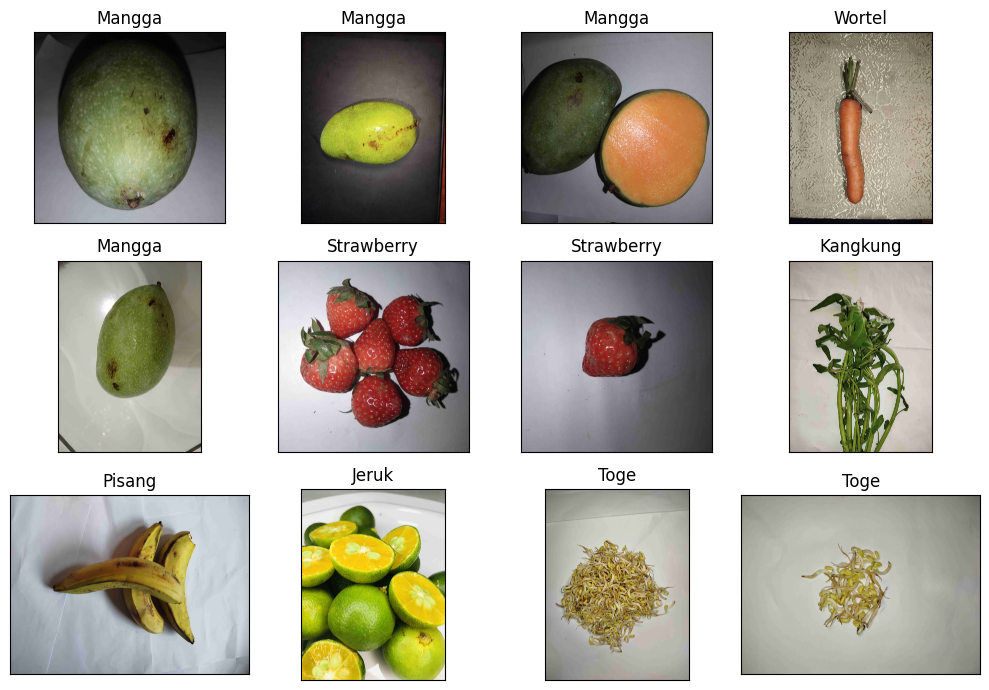

In [ ]:
# Menampilkan beberapa contoh dataset dari directory training
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(train_df.Filepath[i]))
    ax.set_title(train_df.Label[i])
plt.tight_layout()
plt.show()

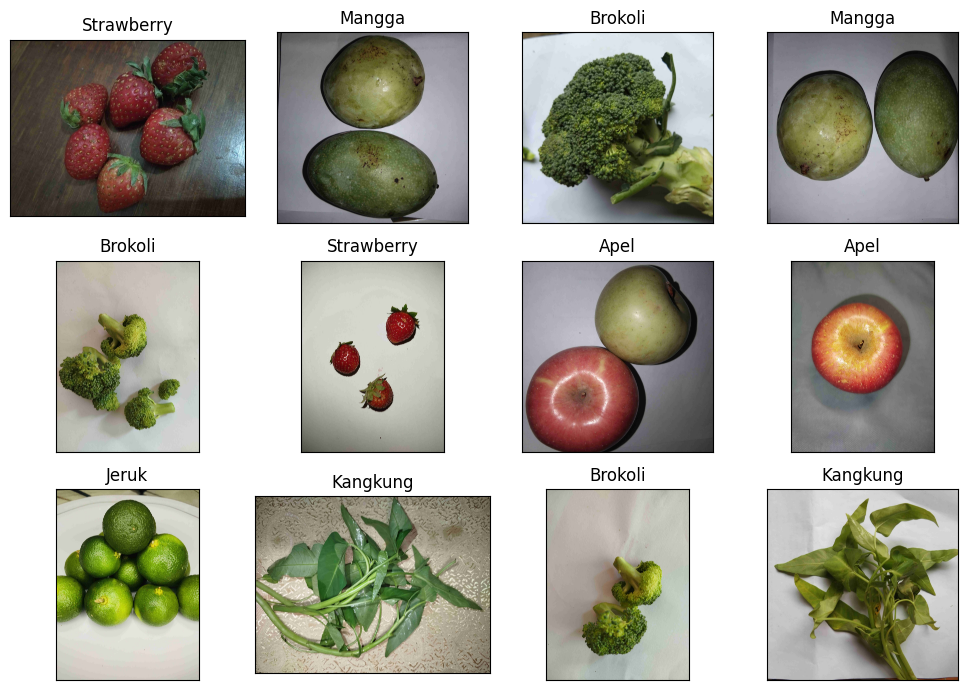

In [ ]:
# Menampilkan beberapa contoh dataset dari directory training
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(val_df.Filepath[i]))
    ax.set_title(val_df.Label[i])
plt.tight_layout()
plt.show()

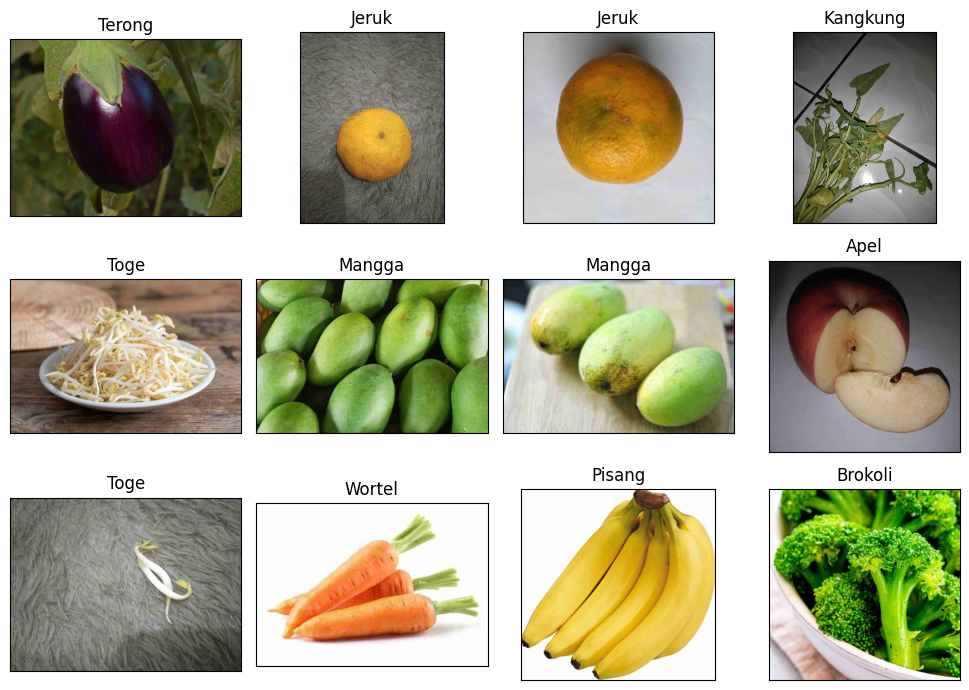

In [ ]:
# Menampilkan beberapa contoh dataset dari directory training
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath[i]))
    ax.set_title(test_df.Label[i])
plt.tight_layout()
plt.show()

<ipython-input-23-67f49b6db74c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vc.index, y = vc, palette = "rocket")


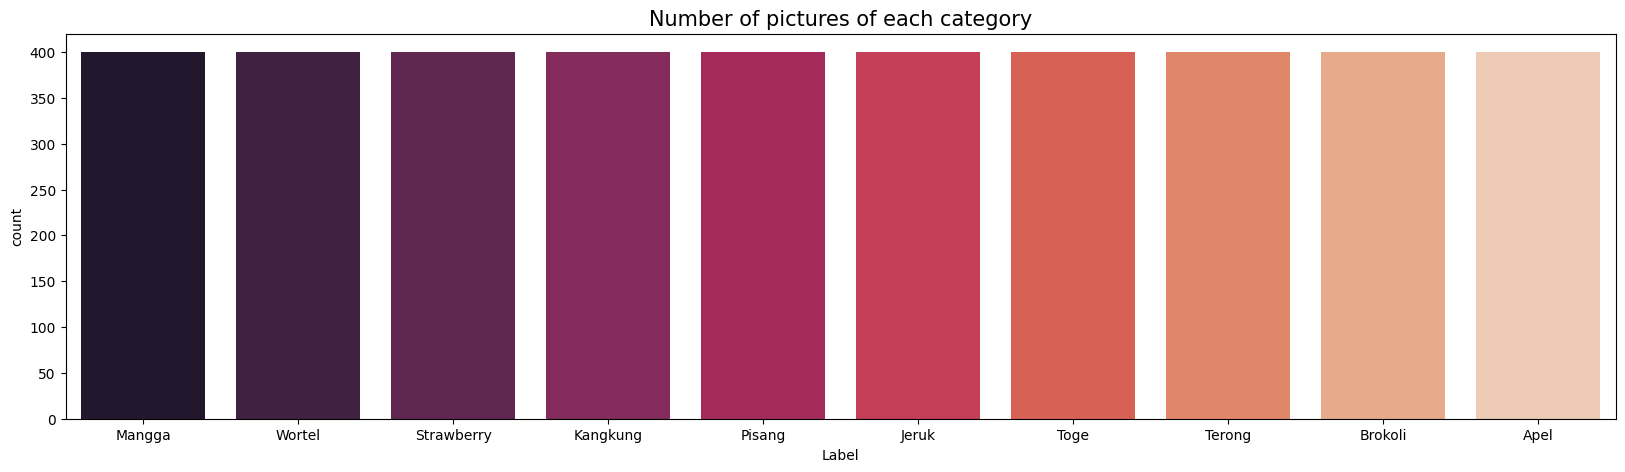

In [ ]:
# Display the number of pictures of each category
import seaborn as sns
vc = train_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

<ipython-input-24-dde8c6bef98d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vc.index, y = vc, palette = "rocket")


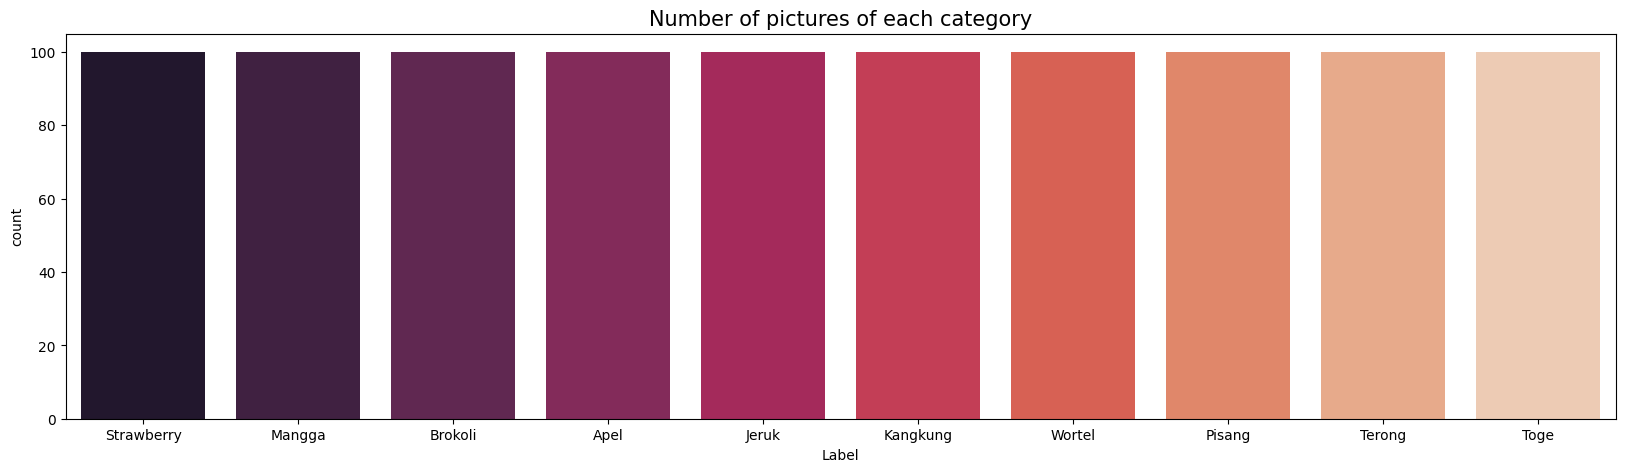

In [ ]:
# Display the number of pictures of each category
import seaborn as sns
vc = val_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

<ipython-input-25-321982c41b0e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vc.index, y = vc, palette = "rocket")


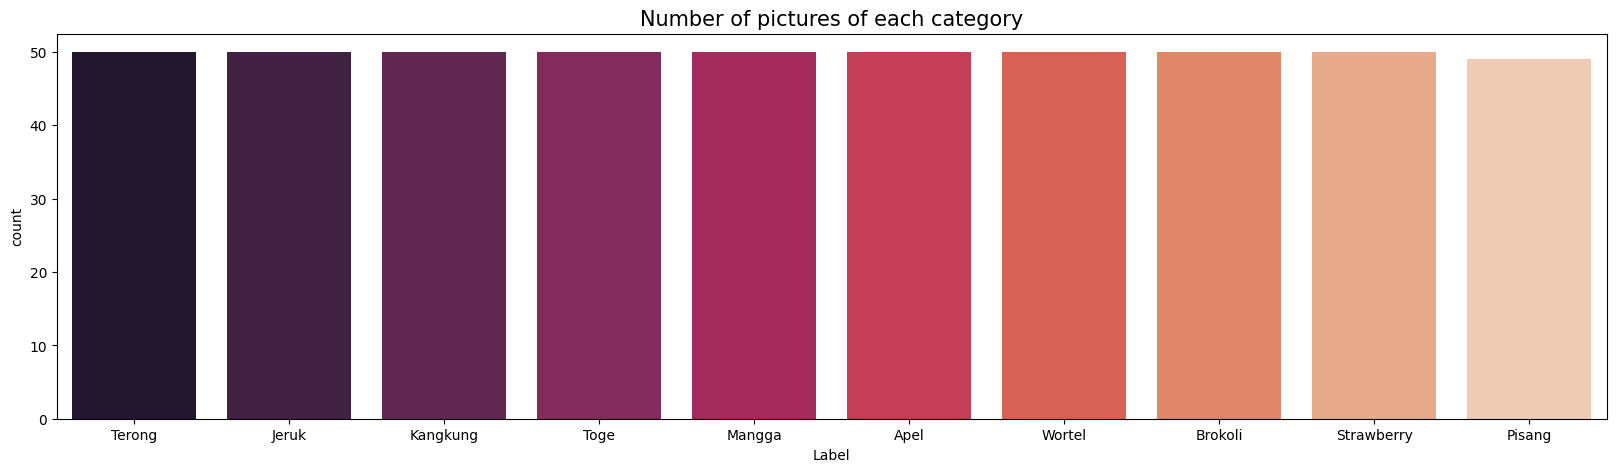

In [ ]:
# Display the number of pictures of each category
import seaborn as sns
vc = test_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

#Preprocessing Data

In [ ]:
#data generator
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_dataframe(dataframe=train_df,
                                         x_col='Filepath',
                                         y_col='Label',
                                         target_size=(224,224),
                                         batch_size=32,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                         )


validasi_data = val_datagen.flow_from_dataframe(dataframe=val_df,
                                         x_col='Filepath',
                                         y_col='Label',
                                         target_size=(224,224),
                                         batch_size=32,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                         )
testing_data = test_datagen.flow_from_dataframe(dataframe=test_df,
                                         x_col='Filepath',
                                         y_col='Label',
                                         target_size=(224,224),
                                         batch_size=32,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                         )

Found 4000 validated image filenames belonging to 10 classes.
Found 1000 validated image filenames belonging to 10 classes.
Found 499 validated image filenames belonging to 10 classes.


In [ ]:
from keras import Model, Input
input_shape = (416,416,3)
model_input = Input(shape=input_shape)

#Modelling ResNet152V2

In [ ]:
ResNet152V2 = ResNet152V2(input_shape=input_shape, input_tensor=model_input, include_top=False, weights="imagenet")

234545216/234545216 [==============================] - 11s 0us/step


In [ ]:
for layer in ResNet152V2.layers:
    layer.trainable = False

In [ ]:
ResNet152V2_last_layer = ResNet152V2.get_layer('conv5_block3_out')
print('last layer output shape:', ResNet152V2_last_layer.output_shape)
ResNet152V2_last_output = ResNet152V2_last_layer.output

last layer output shape: (None, 13, 13, 2048)


In [ ]:
# Flatten the output layer to 1 dimension
x_ResNet152V2 = layers.GlobalMaxPooling2D()(ResNet152V2_last_output)
# Add a fully connected layer with 512 hidden units and relu activation
x_ResNet152V2 = layers.Dense(512, activation='relu')(x_ResNet152V2)
# Add a dropout rate of 0.7
x_ResNet152V2 = layers.Dropout(0.15)(x_ResNet152V2)
# Add a final sigmoid layer for classification
x_ResNet152V2 = layers.Dense(10, activation='softmax')(x_ResNet152V2)

# Configure and compile the model

ResNet152V2_model = Model(model_input, x_ResNet152V2)
optimizer = RMSprop(learning_rate=0.0001)
ResNet152V2_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# ResNet152V2_model.load_weights("ResNet152V2Full.h5")
# ResNet152V2_model.ResNet152V2(pretrained=True)
ResNet152V2_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 416, 416, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 422, 422, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 208, 208, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 210, 210, 64)         0         ['conv1_conv[0][0]']          
                                                                                              

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Tentukan path penyimpanan model
checkpoint_path = '/content/drive/MyDrive/Model/ResNet152V2/ResNet152V2.h5'

# Buat callback ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='val_loss',  # Metrik yang akan dipantau
                                      save_best_only=True,  # Hanya menyimpan model terbaik
                                      save_weights_only=False,  # Menyimpan seluruh model
                                      mode='min',  # Mode pemantauan (misalnya, 'min', 'max', atau 'auto')
                                      verbose=1)  # Menampilkan pesan saat menyimpan

In [ ]:
callbacks= [checkpoint_callback]
history_ResNet152V2 = ResNet152V2_model.fit(
                  train_data,
                  validation_data=validasi_data,
                  steps_per_epoch=train_data.n/32,
                  validation_steps=validasi_data.n/32,
                  epochs=10,
                  callbacks=callbacks)

Epoch 1/10
 85/125 [===================>..........] - ETA: 19:38 - loss: 0.4112 - accuracy: 0.9040

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


125/125 [==============================] - ETA: 0s - loss: 0.3040 - accuracy: 0.9298 
Epoch 1: val_loss improved from inf to 0.03869, saving model to /content/drive/MyDrive/Model/ResNet152V2/ResNet152V2.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


125/125 [==============================] - 4574s 37s/step - loss: 0.3040 - accuracy: 0.9298 - val_loss: 0.0387 - val_accuracy: 0.9940
Epoch 2/10
125/125 [==============================] - ETA: 0s - loss: 0.0301 - accuracy: 0.9942
Epoch 2: val_loss improved from 0.03869 to 0.01570, saving model to /content/drive/MyDrive/Model/ResNet152V2/ResNet152V2.h5
125/125 [==============================] - 248s 2s/step - loss: 0.0301 - accuracy: 0.9942 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 3/10
125/125 [==============================] - ETA: 0s - loss: 0.0121 - accuracy: 0.9980
Epoch 3: val_loss improved from 0.01570 to 0.00780, saving model to /content/drive/MyDrive/Model/ResNet152V2/ResNet152V2.h5
125/125 [==============================] - 311s 2s/step - loss: 0.0121 - accuracy: 0.9980 - val_loss: 0.0078 - val_accuracy: 0.9990
Epoch 4/10
125/125 [==============================] - ETA: 0s - loss: 0.0072 - accuracy: 0.9985
Epoch 4: val_loss improved from 0.00780 to 0.00768, saving model t

In [ ]:
MODEL_BASE_PATH = "/content/drive/MyDrive/ResNet152V2"
PROJECT_NAME = "ResNet152V2"
SAVE_MODEL_NAME = "ResNet152V2.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))

print('Saving Model At {}...'.format(save_model_path))

Saving Model At /content/drive/MyDrive/ResNet152V2/ResNet152V2/ResNet152V2.h5...


#Evaluation

In [ ]:
# Predict the label of the test_images
import numpy as np
pred_test = Model.predict(testing_data)
pred_test = np.argmax(pred_test,axis=1)

# Map the label
labels = (testing_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred_test = [labels[k] for k in pred_test]

# Display the result
print(f'The first 5 predictions: {pred_test[:4]}')

In [ ]:
#plotting
import matplotlib.pyplot as plt
def display_training_curves(training, validation, title, subplot):

    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

<ipython-input-39-d14c9c73262d>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


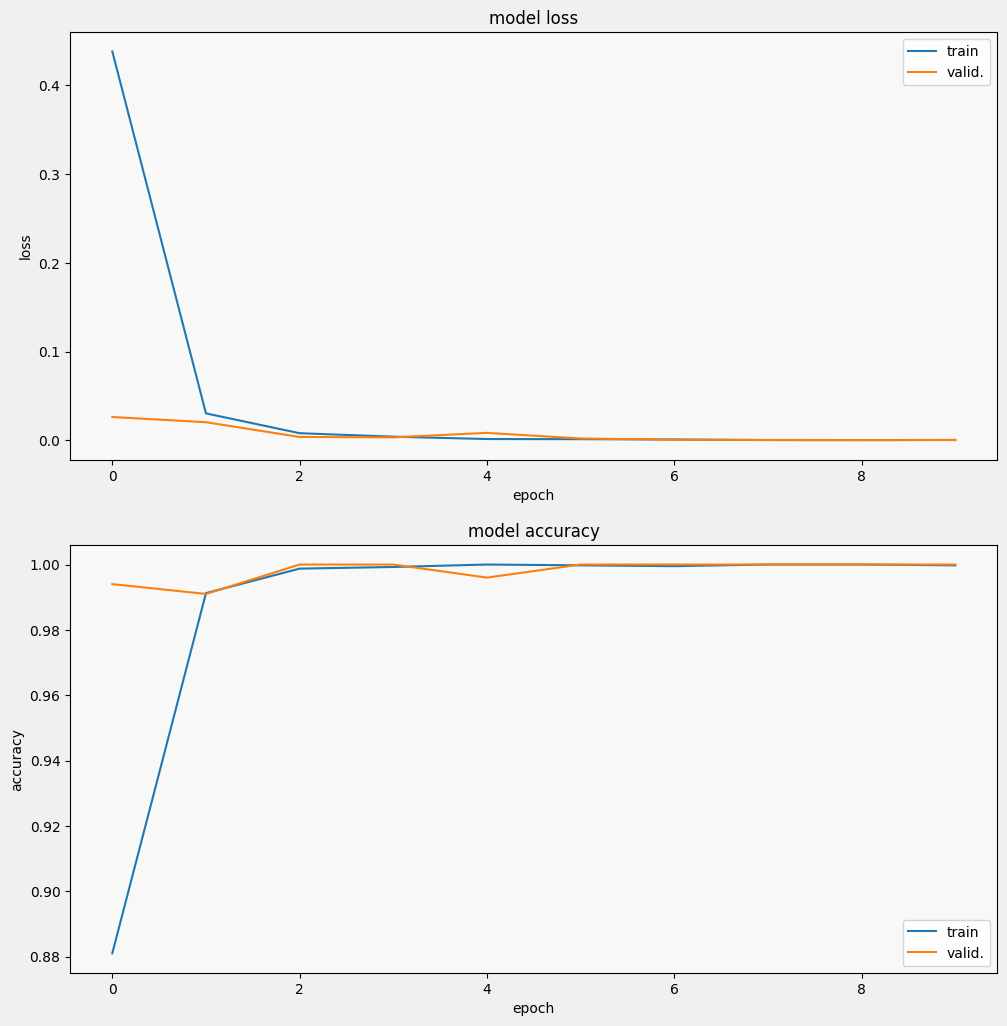

In [ ]:
#display
display_training_curves(
    history_denseNet.history['loss'],
    history_denseNet.history['val_loss'],
    'loss', 211)
display_training_curves(
    history_denseNet.history['accuracy'],
    history_denseNet.history['val_accuracy'],
    'accuracy', 212)

#Evaluation dan Prediction

In [ ]:
#Load Model Dari File .h5
import tensorflow as tf
Model = tf.keras.models.load_model("/content/drive/MyDrive/Model/ResNet152V2/ResNet152V2.h5")


In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop
#compile model
optimizer = RMSprop(learning_rate=0.0001)
Model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# Predict the label of the test_images
import numpy as np
pred_test = Model.predict(testing_data)
pred_test = np.argmax(pred_test,axis=1)

# Map the label
labels = (testing_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred_test = [labels[k] for k in pred_test]

# Display the result
print(f'The first 5 predictions: {pred_test[:5]}')

16/16 [==============================] - 403s 27s/step
The first 5 predictions: ['Terong', 'Jeruk', 'Jeruk', 'Kangkung', 'Toge']


In [ ]:
metrics_test = Model.evaluate(testing_data)

16/16 [==============================] - 25s 1s/step - loss: 0.1522 - accuracy: 0.9539


In [ ]:
#classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import pair_confusion_matrix

y_test = list(test_df.Label)
print(classification_report(y_test, pred_test, digits=5))

              precision    recall  f1-score   support

        Apel    0.97778   0.88000   0.92632        50
     Brokoli    1.00000   1.00000   1.00000        50
       Jeruk    0.81667   0.98000   0.89091        50
    Kangkung    0.90909   1.00000   0.95238        50
      Mangga    0.89091   0.98000   0.93333        50
      Pisang    1.00000   0.97959   0.98969        49
  Strawberry    1.00000   0.94000   0.96907        50
      Terong    1.00000   0.84000   0.91304        50
        Toge    1.00000   1.00000   1.00000        50
      Wortel    1.00000   0.94000   0.96907        50

    accuracy                        0.95391       499
   macro avg    0.95944   0.95396   0.95438       499
weighted avg    0.95936   0.95391   0.95431       499



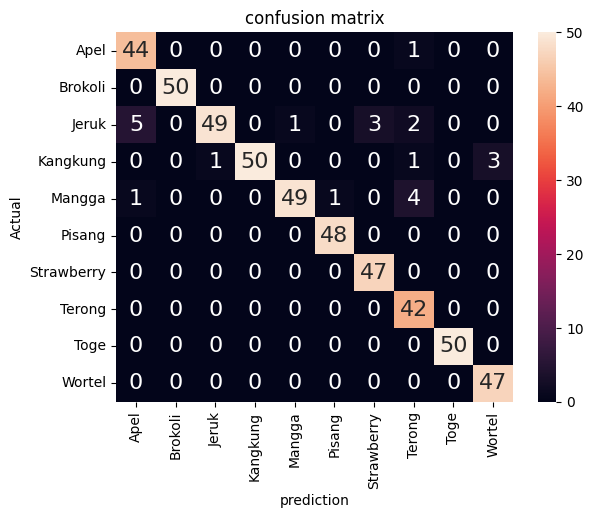

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

cm  = confusion_matrix(pred_test,y_test)

# Ambil nama kelas dari generator data
class_names = list(testing_data.class_indices.keys())
# Buat DataFrame untuk confusion matrix
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

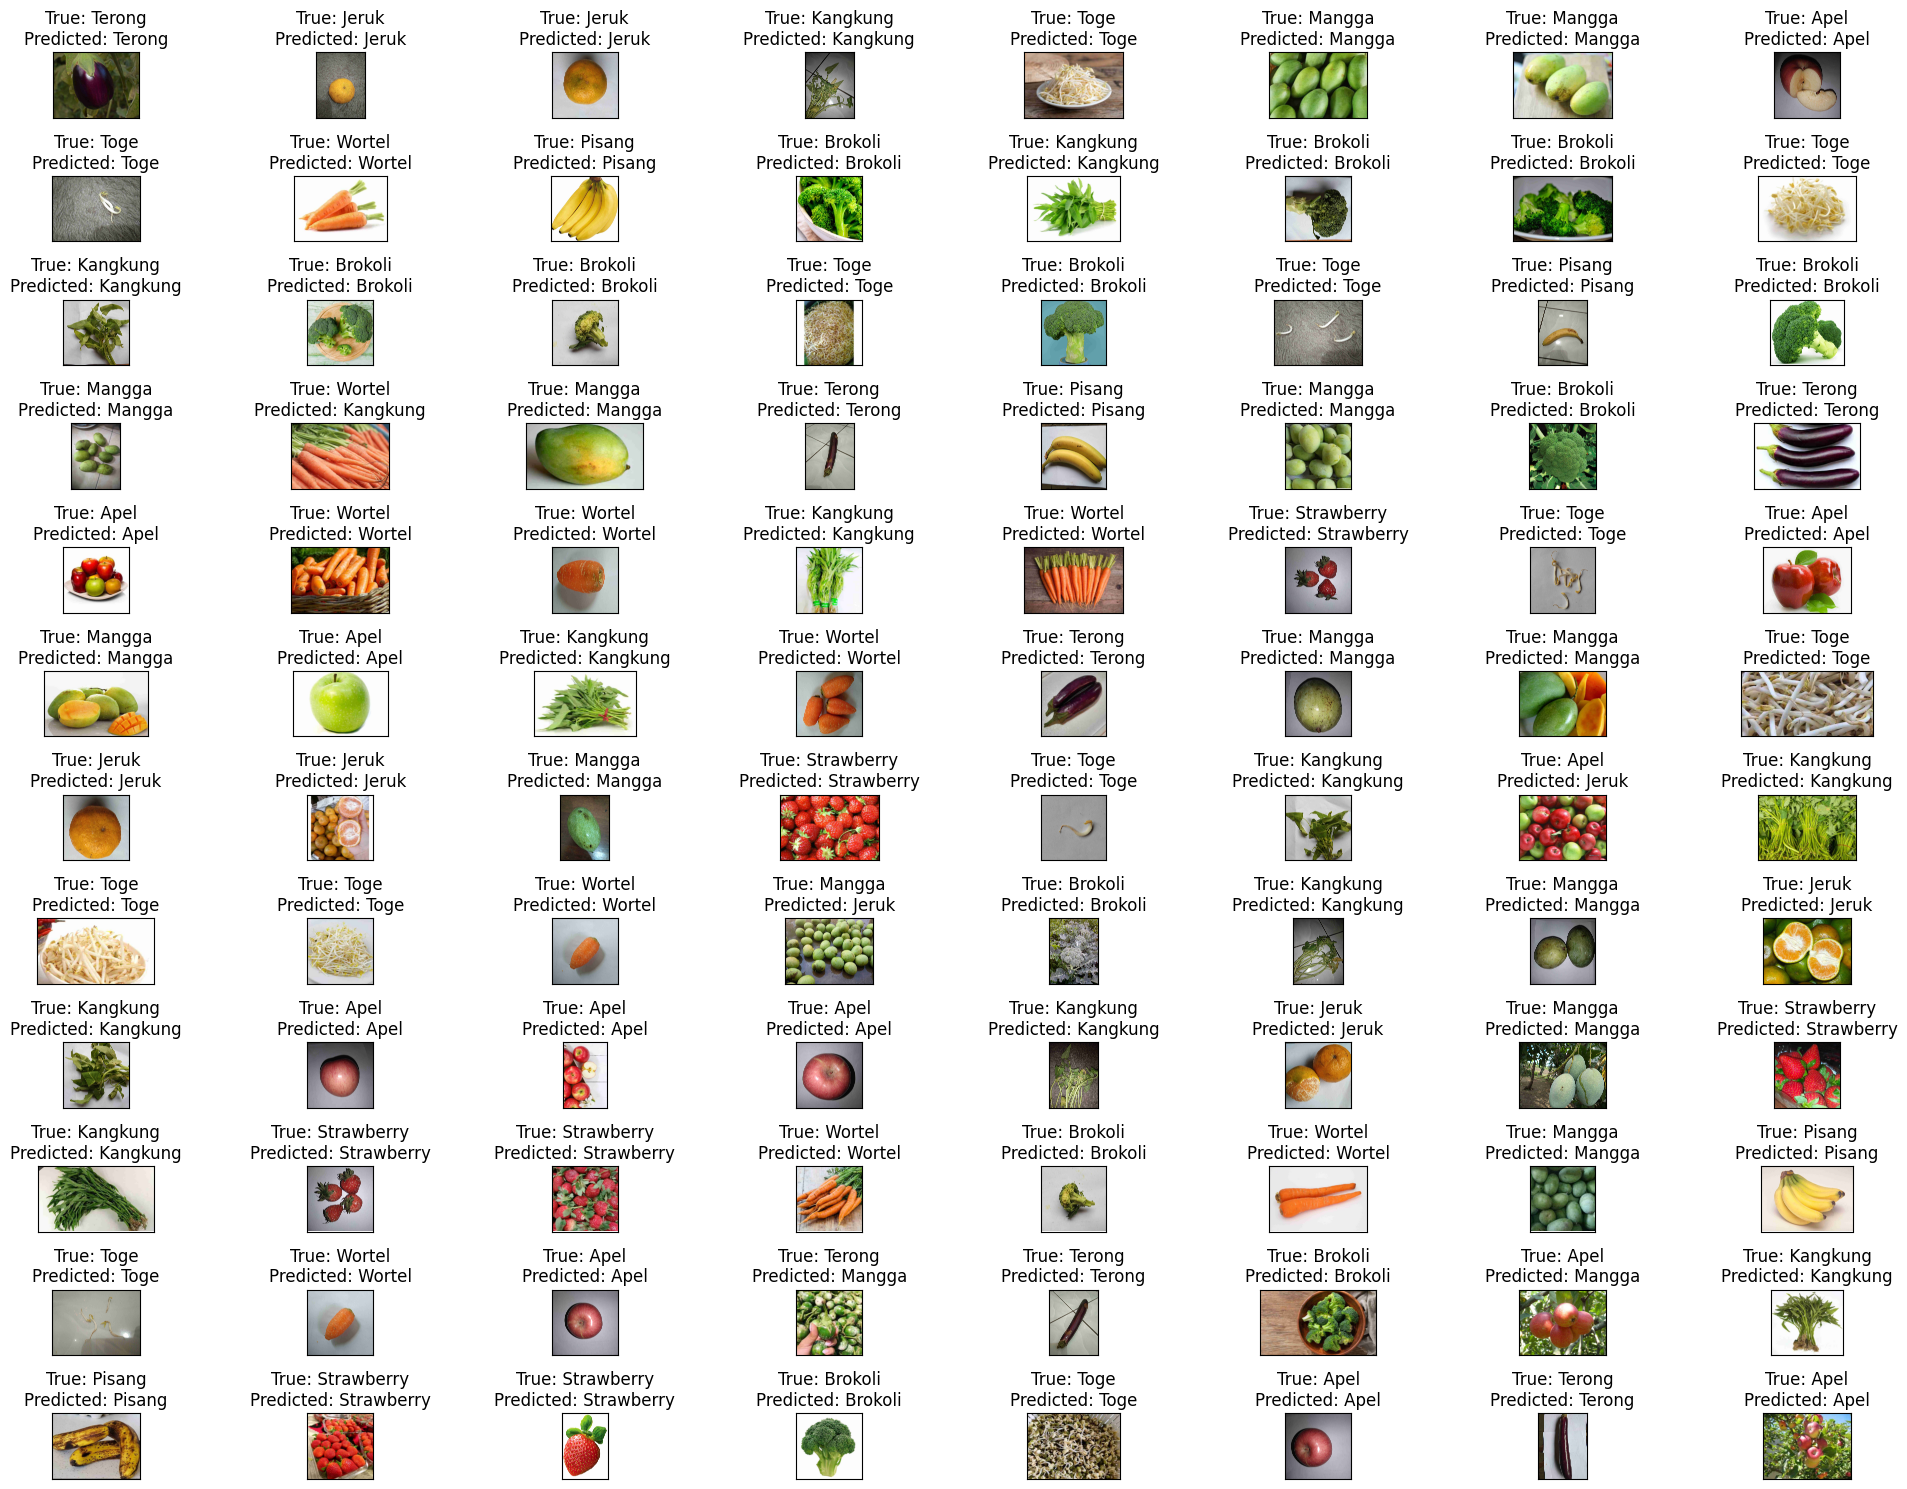

In [ ]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=12, ncols=8, figsize=(20, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred_test[i]}")
plt.tight_layout()
plt.show()

#Testing

Class List: ['Apel', 'Brokoli', 'Jeruk', 'Kangkung', 'Mangga', 'Pisang', 'Strawberry', 'Terong', 'Toge', 'Wortel']


Saving IMG_20240513_222619.jpg to IMG_20240513_222619.jpg
Image: IMG_20240513_222619.jpg
Predicted Class: Apel
Confidence Scores: [9.9998319e-01 8.8185752e-09 8.3921954e-08 6.6111926e-07 6.0787710e-07
 4.6466243e-07 3.5071955e-07 1.1582778e-05 5.0216414e-07 2.5489039e-06]



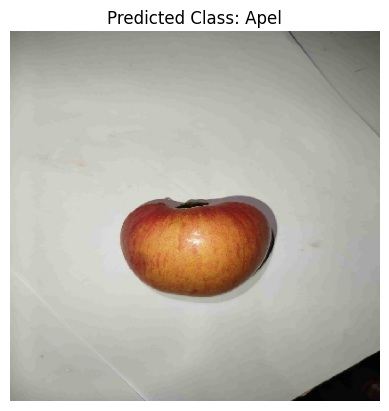

In [ ]:
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
import os
from google.colab import files
import matplotlib.pyplot as plt

# Load trained model
model = tf.keras.models.load_model("/content/drive/MyDrive/Model/ResNet152V2/ResNet152V2.h5")

# Path to directory containing class labels
train_dir = "/content/drive/MyDrive/DEBUSA/training"
class_list = sorted(os.listdir(train_dir))

# Bersihkan class_list dari nama-nama yang tidak valid
class_list = [class_name for class_name in class_list if '.' not in class_name and '/' not in class_name]

# Print class list for verification
print("Class List:", class_list)

# Function to preprocess image
def preprocess_image(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalize pixel values
    return x

# Define the prediction function with @tf.function
@tf.function
def predict(model, x):
    return model(x)

# Upload image
uploaded = files.upload()

# Process and predict class label for each uploaded image
for fn in uploaded.keys():
    # Load and preprocess uploaded image
    img_path = fn
    img = image.load_img(img_path, target_size=(416, 416))
    x = preprocess_image(img)

    # Perform prediction
    predictions = predict(model, x)

    # Get predicted class label
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_list[predicted_class_index]

    # Display prediction result
    print("Image:", img_path)
    print("Predicted Class:", predicted_class)
    print("Confidence Scores:", predictions[0].numpy())
    print()

    # Display the image
    plt.imshow(img)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.axis('off')
    plt.show()


In [ ]:
import os
from tensorflow.keras.models import load_model
import numpy as np

# Muat model dari file .h5
model = load_model("/content/drive/MyDrive/Model/ResNet152V2/ResNet152V2.h5")

# Dapatkan arsitektur model dalam format JSON
model_json = model.to_json()

# Tentukan direktori output di Google Drive
output_dir = '/content/drive/MyDrive/MODEL/ResNet152V2/'
json_path = os.path.join(output_dir, 'model.json')
bin_path = os.path.join(output_dir, 'model_weights.bin')

# Pastikan direktori output ada
os.makedirs(output_dir, exist_ok=True)

# Simpan arsitektur model ke file JSON
with open(json_path, 'w') as json_file:
    json_file.write(model_json)

# Dapatkan bobot model
model_weights = model.get_weights()

# Gabungkan semua bobot menjadi satu array
weights_flat = np.concatenate([w.flatten() for w in model_weights])

# Simpan array bobot ke file BIN
weights_flat.tofile(bin_path)

print(f"Model dan bobot telah berhasil dikonversi dan disimpan ke dalam file JSON ({json_path}) dan BIN ({bin_path}).")


Model dan bobot telah berhasil dikonversi dan disimpan ke dalam file JSON (/content/drive/MyDrive/MODEL/ResNet152V2/model.json) dan BIN (/content/drive/MyDrive/MODEL/ResNet152V2/model_weights.bin).
